In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from datetime import datetime, timedelta

In [2]:
print(int(datetime.now().timestamp()))
print('+' if int(datetime.now().timestamp()) % 2 == 0 else '-')

1720368667
-


In [3]:
def variacao(ultimo, maximo, minimo, fator=0.1):
  media = ((maximo + minimo) / 2)
  if ultimo > media:
    # Calcular a distância ao valor máximo - Calculate the distance to the maximum value
    distancia = maximo - ultimo
  else:
    # Calcular a distância ao valor mínimo - Calculate the distance to the minimum value
    distancia = ultimo - minimo

  # Ajustar a variação proporcional à distância ao valor máximo - Adjust the variation proportional to the distance to the maximum value
  return max(0, distancia * fator * np.random.rand())

In [4]:
def gera_lux(conf: dict, dados: list, falha: bool, tipo_falha: str):
  ultimo_valor = dados[-1]
  # Gera um sinal aleatório - Generate a random signal
  sinal = '+' if random.randint(1, 10) % 2 == 0 else '-'

  # Gerar dados com o sensor ligado - Generate data with the sensor on
  if conf['status'] == True:
    if falha == False:
      # Varia o valor entre o máximo e 95% do máximo - Vary the value between the maximum and 95% of the maximum
      valor = max(conf['maximo'] * 0.95, ultimo_valor + (np.random.rand() * random.choice([-1, 1])))
    else:
      # Verifica o tipo de falha - Check the type of failure
      if tipo_falha == 'total':
        # Varia entre 20% do máximo e o mínimo - Vary between 20% of the maximum and the minimum
        maximo = conf['maximo'] * np.random.uniform(0.1, 0.25)
        distancia = abs(maximo - ultimo_valor) if ultimo_valor < maximo else ultimo_valor
        valor = min(maximo, ultimo_valor + (distancia * np.random.rand() * random.choice([-1, 1])))
      else:
        # Gera um valor que fica entre 40% a 80% - Generate a value that ranges from 40% to 80%
        maximo = conf['maximo'] * np.random.uniform(0.4, 0.8)
        distancia = abs(maximo - ultimo_valor)
        valor = min(maximo, maximo + (distancia * np.random.rand() * random.choice([-1, 1])))
        # Não retorna valores menores que 40% do máximo - Do not return values less than 40% of the maximum
        valor = valor if valor > conf['maximo'] * 0.4 else conf['maximo'] * np.random.uniform(0.35, 0.45)
  else:
    valor = 0

  if valor > conf['maximo']:
    return conf['maximo']
  elif valor < conf['minimo'] and falha == False:
    return conf['minimo']

  return valor if valor > 0 else 0


l_dados = [1]

tamanho = 1000
conf = {'status': True, 'maximo':500, 'minimo': 0}

for _ in range(tamanho):
  l_dados.append(gera_lux(conf=conf, dados=l_dados, falha=False, tipo_falha='parcial'))

for _ in range(tamanho):
  l_dados.append(gera_lux(conf=conf, dados=l_dados, falha=True, tipo_falha='parcial'))

for _ in range(tamanho):
  l_dados.append(gera_lux(conf=conf, dados=l_dados, falha=True, tipo_falha='total'))

for _ in range(tamanho):
  l_dados.append(gera_lux({'status': False, 'maximo':500, 'minimo': 0}, dados=l_dados, falha=True, tipo_falha='total'))

pd.DataFrame(l_dados)

,0
0,1.000000
1,475.000000
2,475.856163
3,475.134408
4,475.149742
...,...
3996,0.000000
3997,0.000000
3998,0.000000
3999,0.000000


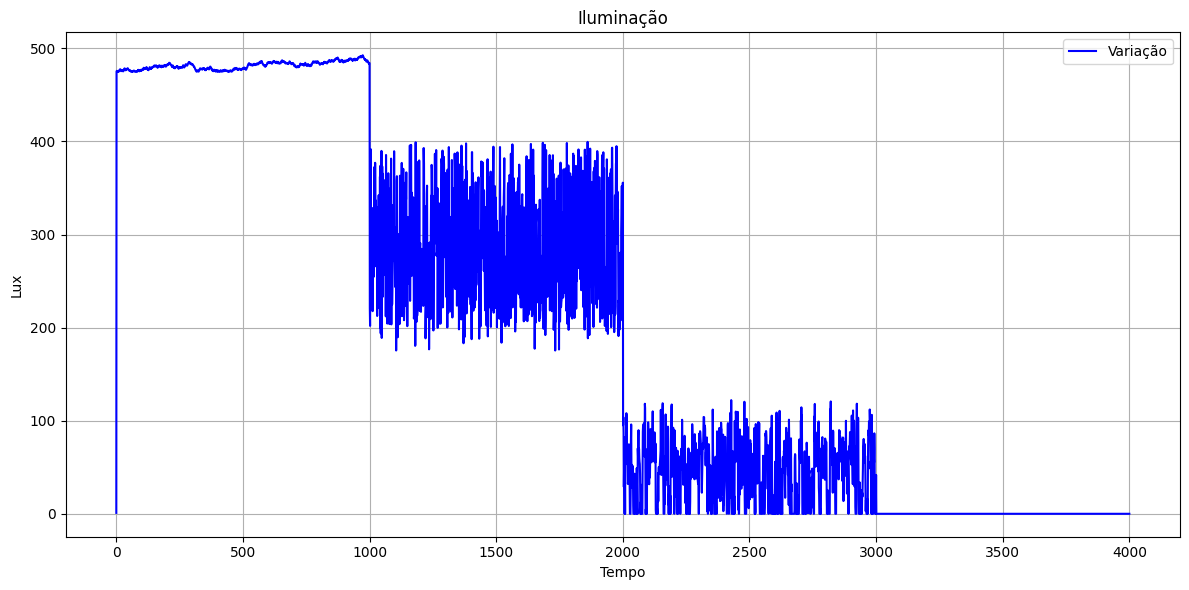

In [5]:
# Plotar os dados - Plot the data
plt.figure(figsize=(12, 6))

plt.subplot(1, 1, 1)
plt.plot(l_dados, label='Variação', color='blue')
plt.title('Iluminação')
plt.xlabel('Tempo')
plt.ylabel('Lux')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
def gera_temp(conf: dict, dados: list, falha: bool, tipo_falha: str):
  ultimo_valor = dados[-1]
  if conf['status'] == False:
    return 0

  if falha == False:
    # Varia o valor entre o máximo e 95% do máximo - Vary the value between the maximum and 95% of the maximum
    return ultimo_valor - variacao(ultimo_valor, conf['maximo'], conf['minimo'], 0.18)
  else:
    # Verifica o tipo de falha - Check the type of failure
    if tipo_falha == 'total':
      minimo = conf['maximo'] * 0.8 if ultimo_valor > conf['maximo'] * 0.8 else ultimo_valor
      ultimo_valor = minimo if ultimo_valor < minimo else ultimo_valor
      return ultimo_valor + variacao(ultimo_valor + 0.01, conf['maximo'], minimo, 0.18)
    else:
      # Gera um valor que fica entre 40% a 80% - Generate a value that ranges from 40% to 80%
      maximo = conf['maximo'] * 0.8
      return ultimo_valor + variacao(ultimo_valor + 0.01, maximo, conf['minimo'], 0.18)

t_dados = [28]

tamanho = 7*100
conf = {'status': True, 'maximo':32, 'minimo': 23}

for _ in range(tamanho):
  t_dados.append(gera_temp(conf=conf, dados=t_dados, falha=False, tipo_falha='parcial'))

for _ in range(tamanho):
  t_dados.append(gera_temp(conf=conf, dados=t_dados, falha=True, tipo_falha='parcial'))

for _ in range(tamanho):
  t_dados.append(gera_temp(conf=conf, dados=t_dados, falha=True, tipo_falha='total'))

for _ in range(tamanho):
  t_dados.append(gera_temp({'status': False, 'maximo':32, 'minimo': 23}, dados=t_dados, falha=True, tipo_falha='total'))

pd.DataFrame(t_dados)

,0
0,28.000000
1,27.838646
2,27.516072
3,27.198171
4,26.512197
...,...
2796,0.000000
2797,0.000000
2798,0.000000
2799,0.000000


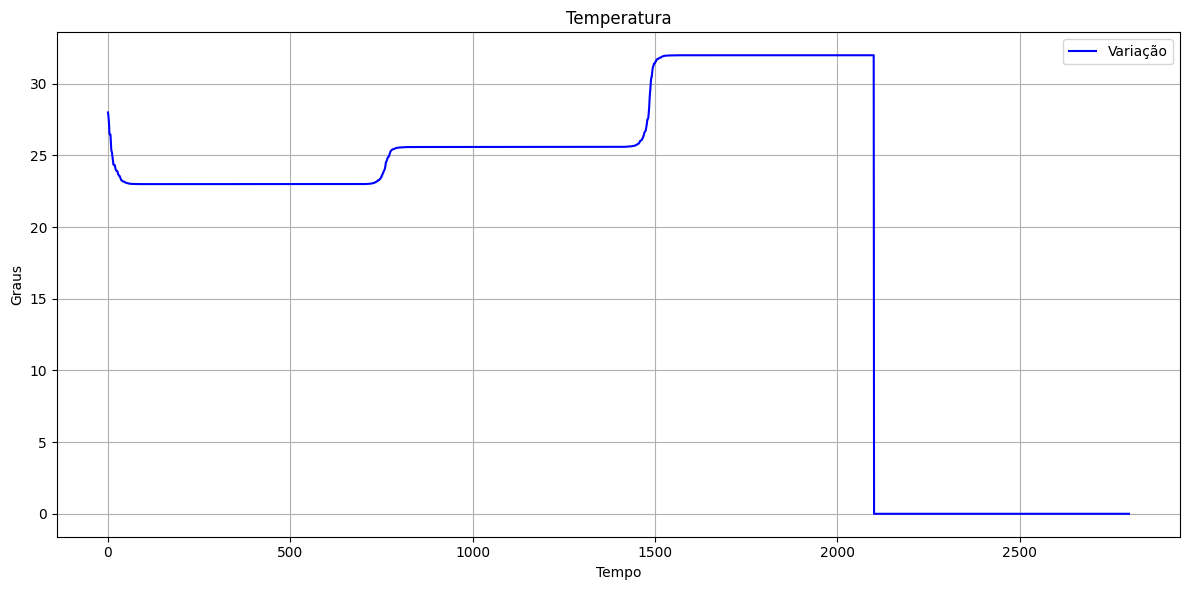

In [7]:
# Plotar os dados - Plot the data
plt.figure(figsize=(12, 6))

plt.subplot(1, 1, 1)
plt.plot(t_dados, label='Variação', color='blue')
plt.title('Temperatura')
plt.xlabel('Tempo')
plt.ylabel('Graus')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
def gera_hum(conf: dict, dados: list, falha: bool, tipo_falha: str):
  ultimo_valor = dados[-1]
  if conf['status'] == False:
    return 0

  if falha == False:
    # Varia o valor entre o máximo e 95% do máximo - Vary the value between the maximum and 95% of the maximum
    return ultimo_valor - variacao(ultimo_valor, conf['maximo'], conf['minimo'], 0.18)
  else:
    # Verifica o tipo de falha - Check the type of failure
    if tipo_falha == 'total':
      minimo = conf['maximo'] * 0.8 if ultimo_valor > conf['maximo'] * 0.8 else ultimo_valor
      ultimo_valor = minimo if ultimo_valor < minimo else ultimo_valor
      return ultimo_valor + variacao(ultimo_valor + 0.01, conf['maximo'], minimo, 0.18)
    else:
      # Gera um valor que fica entre 40% a 80% - Generate a value that ranges from 40% to 80%
      maximo = conf['maximo'] * 0.8
      return ultimo_valor + variacao(ultimo_valor + 0.01, maximo, conf['minimo'], 0.18)

h_dados = [68]

tamanho = 7*100
conf = {'status': True, 'maximo':75, 'minimo': 45}

for _ in range(tamanho):
  h_dados.append(gera_hum(conf=conf, dados=h_dados, falha=False, tipo_falha='parcial'))

for _ in range(tamanho):
  h_dados.append(gera_hum(conf=conf, dados=h_dados, falha=True, tipo_falha='parcial'))

for _ in range(tamanho):
  h_dados.append(gera_hum(conf=conf, dados=h_dados, falha=True, tipo_falha='total'))

for _ in range(tamanho):
  h_dados.append(gera_hum({'status': False, 'maximo':75, 'minimo': 45}, dados=h_dados, falha=True, tipo_falha='total'))

pd.DataFrame(h_dados)

,0
0,68.000000
1,67.031122
2,66.079827
3,64.755252
4,63.199229
...,...
2796,0.000000
2797,0.000000
2798,0.000000
2799,0.000000


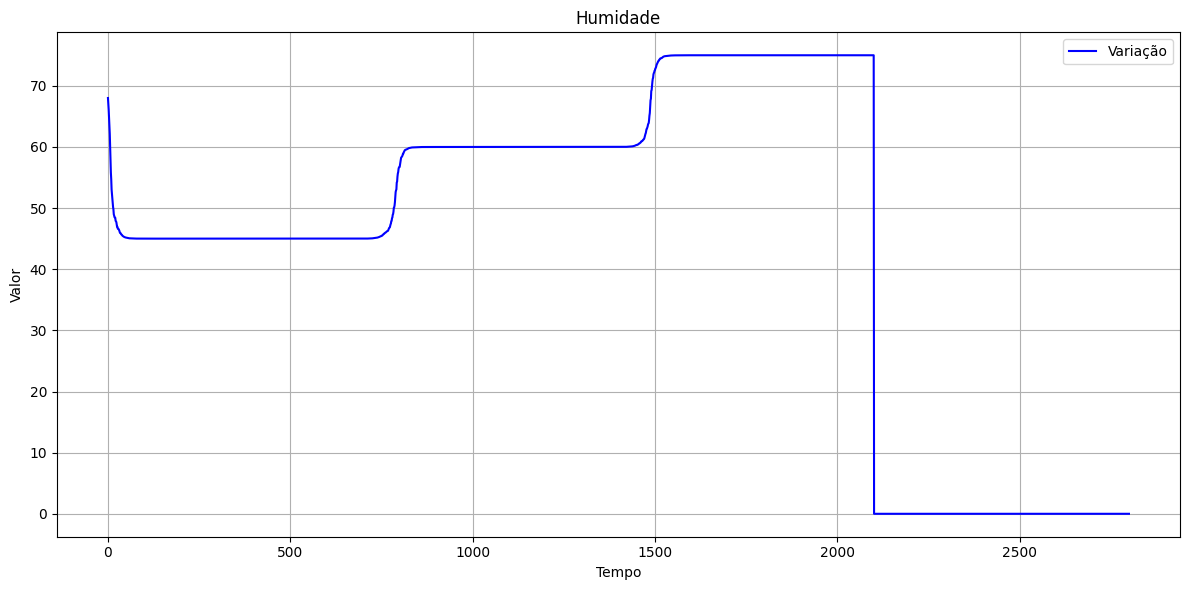

In [9]:
# Plotar os dados - Plot the data
plt.figure(figsize=(12, 6))

plt.subplot(1, 1, 1)
plt.plot(h_dados, label='Variação', color='blue')
plt.title('Humidade')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [10]:
# Montando o dataset - Building the dataset

# Funcionamento normal - Normal operation

tamanho = 700

# Dados dos atuadores - Actuator data
actuators = {'ac_status': 1, 'door_status': 1, 'light_status': 1}

# Dados de temperatura - Temperature data
t_conf = {'status': True if actuators['ac_status'] == 1 else False, 'maximo':32, 'minimo': 23}
t_status = [actuators['ac_status']]

# Dados da humidade - Humidity data
h_conf = {'status': True if actuators['ac_status'] == 1 else False, 'maximo':75, 'minimo': 45}
h_status = [actuators['ac_status']]

# Dados do luximetro - Luxmeter data
l_conf = {'status': True if actuators['light_status'] == 1 else False, 'maximo':500, 'minimo': 0}
l_status = [actuators['light_status']]

# Gera a lista do status dos atuadores - Generate the list of actuator status
ac_status = [actuators['ac_status']]
door_status = [actuators['ac_status']]
light_status = [actuators['light_status']]

# 0 = normal, 1 = notificar ar condicionado, 2 = notificar iluminação, 3 = Iluminação e ar condicionado - 0 = normal, 1 = notify air conditioning, 2 = notify lighting, 3 = Lighting and air conditioning
label = [0]

# Dados inicializados - Initialized data
h_dados = [68]
t_dados = [28]
l_dados = [1]

In [11]:
# Funcionamento Normal - Normal operation
label += [0] * tamanho
ac_status += [1] * tamanho
door_status += [1] * tamanho
light_status += [1] * tamanho
## Temperatura - Temperature
for _ in range(tamanho):
  t_dados.append(gera_temp(conf=t_conf, dados=t_dados, falha=False, tipo_falha='parcial'))
  t_status.append(actuators['ac_status'])
## Humidade - Humidity
for _ in range(tamanho):
  h_dados.append(gera_hum(conf=h_conf, dados=h_dados, falha=False, tipo_falha='parcial'))
  h_status.append(actuators['ac_status'])
## Temperatura - Temperature
for _ in range(tamanho):
  l_dados.append(gera_lux(conf=l_conf, dados=l_dados, falha=False, tipo_falha='parcial'))
  l_status.append(actuators['light_status'])

# Vericando tamanho - Checking size
print('t: ' + str(len(t_dados)))
print('h: ' + str(len(h_dados)))
print('l: ' + str(len(l_dados)))
print('label: ' + str(len(label)))
print('AC: ' + str(len(ac_status)))
print('Door: ' + str(len(door_status)))
print('Light: ' + str(len(light_status)))


t: 701
h: 701
l: 701
label: 701
AC: 701
Door: 701
Light: 701


In [12]:

# Falhas - Failures
## Parcial - Caso 1
label += [1] * tamanho
ac_status += [1] * tamanho
door_status += [1] * tamanho
light_status += [1] * tamanho
### Temperatura - Temperature
for _ in range(tamanho):
  t_dados.append(gera_temp(conf=t_conf, dados=t_dados, falha=True, tipo_falha='parcial'))
  t_status.append(actuators['ac_status'])
### Humidade - Humidity
for _ in range(tamanho):
  h_dados.append(gera_hum(conf=h_conf, dados=h_dados, falha=True, tipo_falha='parcial'))
  h_status.append(actuators['ac_status'])
### Luminosidade - Luminosity
for _ in range(tamanho):
  l_dados.append(gera_lux(conf=l_conf, dados=l_dados, falha=False, tipo_falha='parcial'))
  l_status.append(actuators['light_status'])

## Parcial - Caso 2 - Partial - Case 2
label += [2] * tamanho
ac_status += [1] * tamanho
door_status += [1] * tamanho
light_status += [1] * tamanho
### Temperatura - Temperature
for _ in range(tamanho):
  t_dados.append(gera_temp(conf=t_conf, dados=t_dados, falha=False, tipo_falha='parcial'))
  t_status.append(actuators['ac_status'])
### Humidade - Humidity
for _ in range(tamanho):
  h_dados.append(gera_hum(conf=h_conf, dados=h_dados, falha=False, tipo_falha='parcial'))
  h_status.append(actuators['ac_status'])
### Luminosidade - Luminosity
for _ in range(tamanho):
  l_dados.append(gera_lux(conf=l_conf, dados=l_dados, falha=True, tipo_falha='parcial'))
  l_status.append(actuators['light_status'])

## Parcial - Caso 3 - Partial - Case 3
label += [3] * tamanho
ac_status += [1] * tamanho
door_status += [1] * tamanho
light_status += [1] * tamanho
### Temperatura - Temperature
for _ in range(tamanho):
  t_dados.append(gera_temp(conf=t_conf, dados=t_dados, falha=True, tipo_falha='parcial'))
  t_status.append(actuators['ac_status'])
### Humidade - Humidity
for _ in range(tamanho):
  h_dados.append(gera_hum(conf=h_conf, dados=h_dados, falha=True, tipo_falha='parcial'))
  h_status.append(actuators['ac_status'])
### Luminosidade - Luminosity
for _ in range(tamanho):
  l_dados.append(gera_lux(conf=l_conf, dados=l_dados, falha=True, tipo_falha='parcial'))
  l_status.append(actuators['light_status'])

# Vericando tamanho - Checking size
print('t: ' + str(len(t_dados)))
print('h: ' + str(len(h_dados)))
print('l: ' + str(len(l_dados)))
print('label: ' + str(len(label)))
print('AC: ' + str(len(ac_status)))
print('Door: ' + str(len(door_status)))
print('Light: ' + str(len(light_status)))

t: 2801
h: 2801
l: 2801
label: 2801
AC: 2801
Door: 2801
Light: 2801


In [13]:
## Falha total - Cas 1 - Total failure - Case 1
label += [1] * tamanho
ac_status += [1] * tamanho
door_status += [1] * tamanho
light_status += [1] * tamanho
### Temperatura - Temperature
for _ in range(tamanho):
  t_dados.append(gera_temp(conf=t_conf, dados=t_dados, falha=True, tipo_falha='total'))
  t_status.append(actuators['ac_status'])
### Humidade - Humidity
for _ in range(tamanho):
  h_dados.append(gera_hum(conf=h_conf, dados=h_dados, falha=True, tipo_falha='total'))
  h_status.append(actuators['ac_status'])
### Luminosidade - 
for _ in range(tamanho):
  l_dados.append(gera_lux(conf=l_conf, dados=l_dados, falha=False, tipo_falha='total'))
  l_status.append(actuators['light_status'])

## Falha total - Cas 2 - 
label += [2] * tamanho
ac_status += [1] * tamanho
door_status += [1] * tamanho
light_status += [1] * tamanho
### Temperatura - Temperature
for _ in range(tamanho):
  t_dados.append(gera_temp(conf=t_conf, dados=t_dados, falha=False, tipo_falha='total'))
  t_status.append(actuators['ac_status'])
### Humidade - Humidity
for _ in range(tamanho):
  h_dados.append(gera_hum(conf=h_conf, dados=h_dados, falha=False, tipo_falha='total'))
  h_status.append(actuators['ac_status'])
### Luminosidade - 
for _ in range(tamanho):
  l_dados.append(gera_lux(conf=l_conf, dados=l_dados, falha=True, tipo_falha='total'))
  l_status.append(actuators['light_status'])

## Falha total - Caso 3 -  Total failure - Case 3
label += [3] * tamanho
ac_status += [1] * tamanho
door_status += [1] * tamanho
light_status += [1] * tamanho
### Temperatura - T
for _ in range(tamanho):
  t_dados.append(gera_temp(conf=t_conf, dados=t_dados, falha=True, tipo_falha='total'))
  t_status.append(actuators['ac_status'])
### Humidade - Humidity
for _ in range(tamanho):
  h_dados.append(gera_hum(conf=h_conf, dados=h_dados, falha=True, tipo_falha='total'))
  h_status.append(actuators['ac_status'])
### Luminosidade - L
for _ in range(tamanho):
  l_dados.append(gera_lux(conf=l_conf, dados=l_dados, falha=True, tipo_falha='total'))
  l_status.append(actuators['light_status'])

# Vericando tamanho - Checking size
print('t: ' + str(len(t_dados)))
print('h: ' + str(len(h_dados)))
print('l: ' + str(len(l_dados)))
print('label: ' + str(len(label)))
print('AC: ' + str(len(ac_status)))
print('Door: ' + str(len(door_status)))
print('Light: ' + str(len(light_status)))

t: 4901
h: 4901
l: 4901
label: 4901
AC: 4901
Door: 4901
Light: 4901


In [14]:
## Sensor desligado - Caso 1 - Sensor off - Case 1
label += [0] * tamanho
ac_status += [1] * tamanho
door_status += [1] * tamanho
light_status += [1] * tamanho
### Temperatura - Temperature
for _ in range(tamanho):
  t_dados.append(gera_temp(conf={'status': False, 'maximo':32, 'minimo': 23}, dados=t_dados, falha=False, tipo_falha='total'))
  t_status.append(0)
### Humidade - 
for _ in range(tamanho):
  h_dados.append(gera_hum(conf={'status': True, 'maximo':75, 'minimo': 45}, dados=h_dados, falha=False, tipo_falha='total'))
  h_status.append(1)
### Luminosidade - Luminosity
for _ in range(tamanho):
  l_dados.append(gera_lux(conf={'status': True, 'maximo':500, 'minimo': 0}, dados=l_dados, falha=False, tipo_falha='total'))
  l_status.append(1)

## Sensor desligado - Caso 2 - Sensor off - Case 2
label += [0] * tamanho
ac_status += [1] * tamanho
door_status += [1] * tamanho
light_status += [1] * tamanho
### Temperatura - Temperature
for _ in range(tamanho):
  t_dados.append(gera_temp(conf={'status': True, 'maximo':32, 'minimo': 23}, dados=t_dados, falha=False, tipo_falha='total'))
  t_status.append(1)
### Humidade - 
for _ in range(tamanho):
  h_dados.append(gera_hum(conf={'status': False, 'maximo':75, 'minimo': 45}, dados=h_dados, falha=False, tipo_falha='total'))
  h_status.append(0)
### Luminosidade - 
for _ in range(tamanho):
  l_dados.append(gera_lux(conf={'status': True, 'maximo':500, 'minimo': 0}, dados=l_dados, falha=False, tipo_falha='total'))
  l_status.append(1)

## Sensor desligado - Caso 3 - Sensor off - Case 3
label += [0] * tamanho
ac_status += [1] * tamanho
door_status += [1] * tamanho
light_status += [1] * tamanho
### Temperatura - Temperature
for _ in range(tamanho):
  t_dados.append(gera_temp(conf={'status': True, 'maximo':32, 'minimo': 23}, dados=t_dados, falha=False, tipo_falha='total'))
  t_status.append(1)
### Humidade - Humidity
for _ in range(tamanho):
  h_dados.append(gera_hum(conf={'status': True, 'maximo':75, 'minimo': 45}, dados=h_dados, falha=False, tipo_falha='total'))
  h_status.append(1)
### Luminosidade - Luminosity
for _ in range(tamanho):
  l_dados.append(gera_lux(conf={'status': False, 'maximo':500, 'minimo': 0}, dados=l_dados, falha=False, tipo_falha='total'))
  l_status.append(0)

# Vericando tamanho - Checking size
print('t: ' + str(len(t_dados)))
print('h: ' + str(len(h_dados)))
print('l: ' + str(len(l_dados)))
print('label: ' + str(len(label)))
print('AC: ' + str(len(ac_status)))
print('Door: ' + str(len(door_status)))
print('Light: ' + str(len(light_status)))

t: 7001
h: 7001
l: 7001
label: 7001
AC: 7001
Door: 7001
Light: 7001


In [15]:
## Atuador desligado - Ar condicionado - Actuator off - Air conditioning
label += [0] * tamanho
ac_status += [0] * tamanho
door_status += [1] * tamanho
light_status += [1] * tamanho
### Temperatura - Temperature
for _ in range(tamanho):
  t_dados.append(gera_temp(conf={'status': True, 'maximo':32, 'minimo': 23}, dados=t_dados, falha=True, tipo_falha='total'))
  t_status.append(1)
### Humidade - Humidity
for _ in range(tamanho):
  h_dados.append(gera_hum(conf={'status': True, 'maximo':75, 'minimo': 45}, dados=h_dados, falha=True, tipo_falha='total'))
  h_status.append(1)
### Luminosidade - Luminosity
for _ in range(tamanho):
  l_dados.append(gera_lux(conf={'status': True, 'maximo':500, 'minimo': 0}, dados=l_dados, falha=False, tipo_falha='total'))
  l_status.append(1)

## Atuador desligado - Iluminação - Actuator off - Lighting
label += [0] * tamanho
ac_status += [1] * tamanho
door_status += [1] * tamanho
light_status += [0] * tamanho
### Temperatura - Temperature
for _ in range(tamanho):
  t_dados.append(gera_temp(conf={'status': True, 'maximo':32, 'minimo': 23}, dados=t_dados, falha=False, tipo_falha='total'))
  t_status.append(1)
### Humidade - Humidity
for _ in range(tamanho):
  h_dados.append(gera_hum(conf={'status': True, 'maximo':75, 'minimo': 45}, dados=h_dados, falha=False, tipo_falha='total'))
  h_status.append(1)
### Luminosidade - Luminosity
for _ in range(tamanho):
  l_dados.append(gera_lux(conf={'status': True, 'maximo':500, 'minimo': 0}, dados=l_dados, falha=True, tipo_falha='total'))
  l_status.append(1)

timestamp = [datetime(2023, 6, 5, 9, 35, 2).timestamp()]
for _ in range(len(t_dados) - 1):
        t = datetime.fromtimestamp(timestamp[-1]) + timedelta(minutes=1)
        timestamp.append(t.timestamp())

# Vericando tamanho - Checking size
print('t: ' + str(len(t_dados)))
print('h: ' + str(len(h_dados)))
print('l: ' + str(len(l_dados)))
print('label: ' + str(len(label)))
print('AC: ' + str(len(ac_status)))
print('Door: ' + str(len(door_status)))
print('Light: ' + str(len(light_status)))
print('Timestamp: ' + str(len(timestamp)))

t: 8401
h: 8401
l: 8401
label: 8401
AC: 8401
Door: 8401
Light: 8401
Timestamp: 8401


In [16]:
environment_temperature = [23] * len(t_dados)
environment_lux = [500] * len(t_dados)

dados = {}
dados['temperature'] = t_dados
dados['humidity'] = h_dados
dados['lux'] = l_dados
dados['temperature_status'] = t_status
dados['humidity_status'] = h_status
dados['lux_status'] = l_status
dados['climate_switch'] = ac_status
dados['door_actuator'] = door_status
dados['light_switch'] = light_status
dados['timestamp'] = timestamp
dados['environment_temperature'] = environment_temperature
dados['environment_lux'] = environment_lux
dados['label'] = label

df = pd.DataFrame(dados)
df.to_csv('dataset.csv', index=False)
df

,temperature,humidity,lux,temperature_status,humidity_status,lux_status,climate_switch,door_actuator,light_switch,timestamp,environment_temperature,environment_lux,label
0,28.000000,68.000000,1.000000,1,1,1,1,1,1,1.685958e+09,23,500,0
1,27.599886,66.896156,475.000000,1,1,1,1,1,1,1.685958e+09,23,500,0
2,27.302920,66.330430,475.000000,1,1,1,1,1,1,1.685958e+09,23,500,0
3,26.716253,65.453923,475.090468,1,1,1,1,1,1,1.685958e+09,23,500,0
4,26.633048,65.095657,475.897761,1,1,1,1,1,1,1.685958e+09,23,500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,0.619696,0.638038,96.293760,1,1,1,1,1,0,1.686461e+09,23,500,0
8397,0.619696,0.638038,16.476157,1,1,1,1,1,0,1.686462e+09,23,500,0
8398,0.619696,0.638038,31.779269,1,1,1,1,1,0,1.686462e+09,23,500,0
8399,0.619696,0.638038,0.000000,1,1,1,1,1,0,1.686462e+09,23,500,0


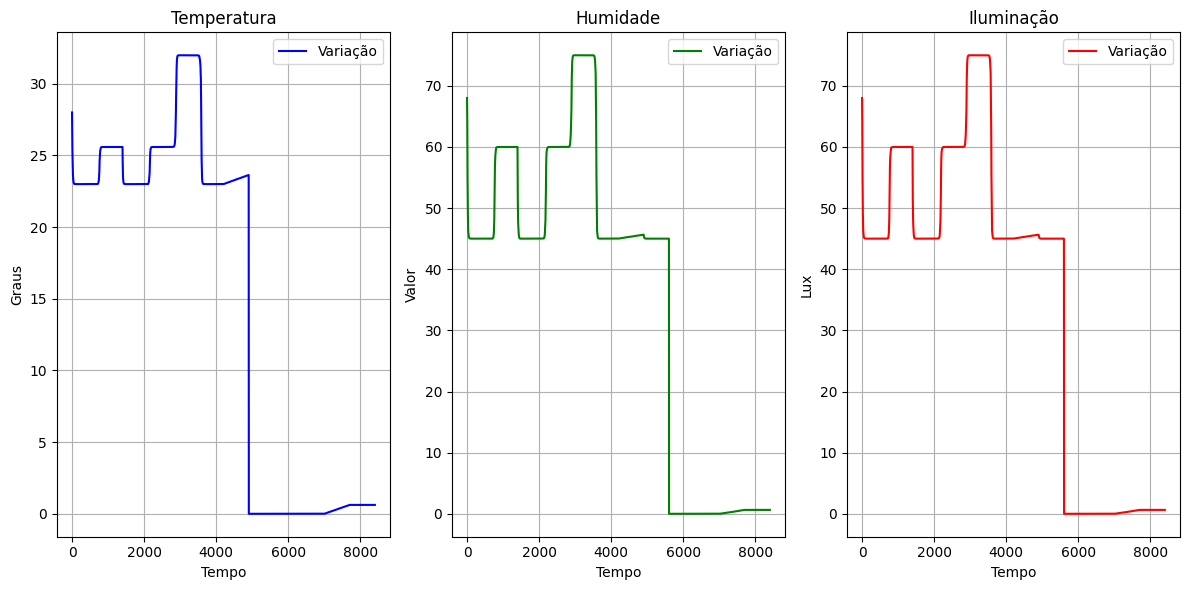

In [17]:
# Plotar os dados - Plot the data
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(t_dados, label='Variação', color='blue')
plt.title('Temperatura')
plt.xlabel('Tempo')
plt.ylabel('Graus')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(h_dados, label='Variação', color='green')
plt.title('Humidade')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(h_dados, label='Variação', color='red')
plt.title('Iluminação')
plt.xlabel('Tempo')
plt.ylabel('Lux')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()